In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import pooch

## Sea floor age

In [2]:
url = "https://www.earthbyte.org/webdav/ftp/earthbyte/agegrid/2020/Grids/age.2020.1.GeeK2007.6m.nc"

fname = pooch.retrieve(url, known_hash=None)
fname

'/home/santi/.cache/pooch/732b7024df9a83da25746169b8dd5c2e-age.2020.1.GeeK2007.6m.nc'

In [3]:
da = xr.open_dataarray(fname)
da

<xarray.DataArray 'z' (lat: 1801, lon: 3601)> Size: 26MB
[6485401 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 29kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat      (lat) float64 14kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
Attributes:
    long_name:     z
    actual_range:  [9.99999978e-03 3.38683990e+02]

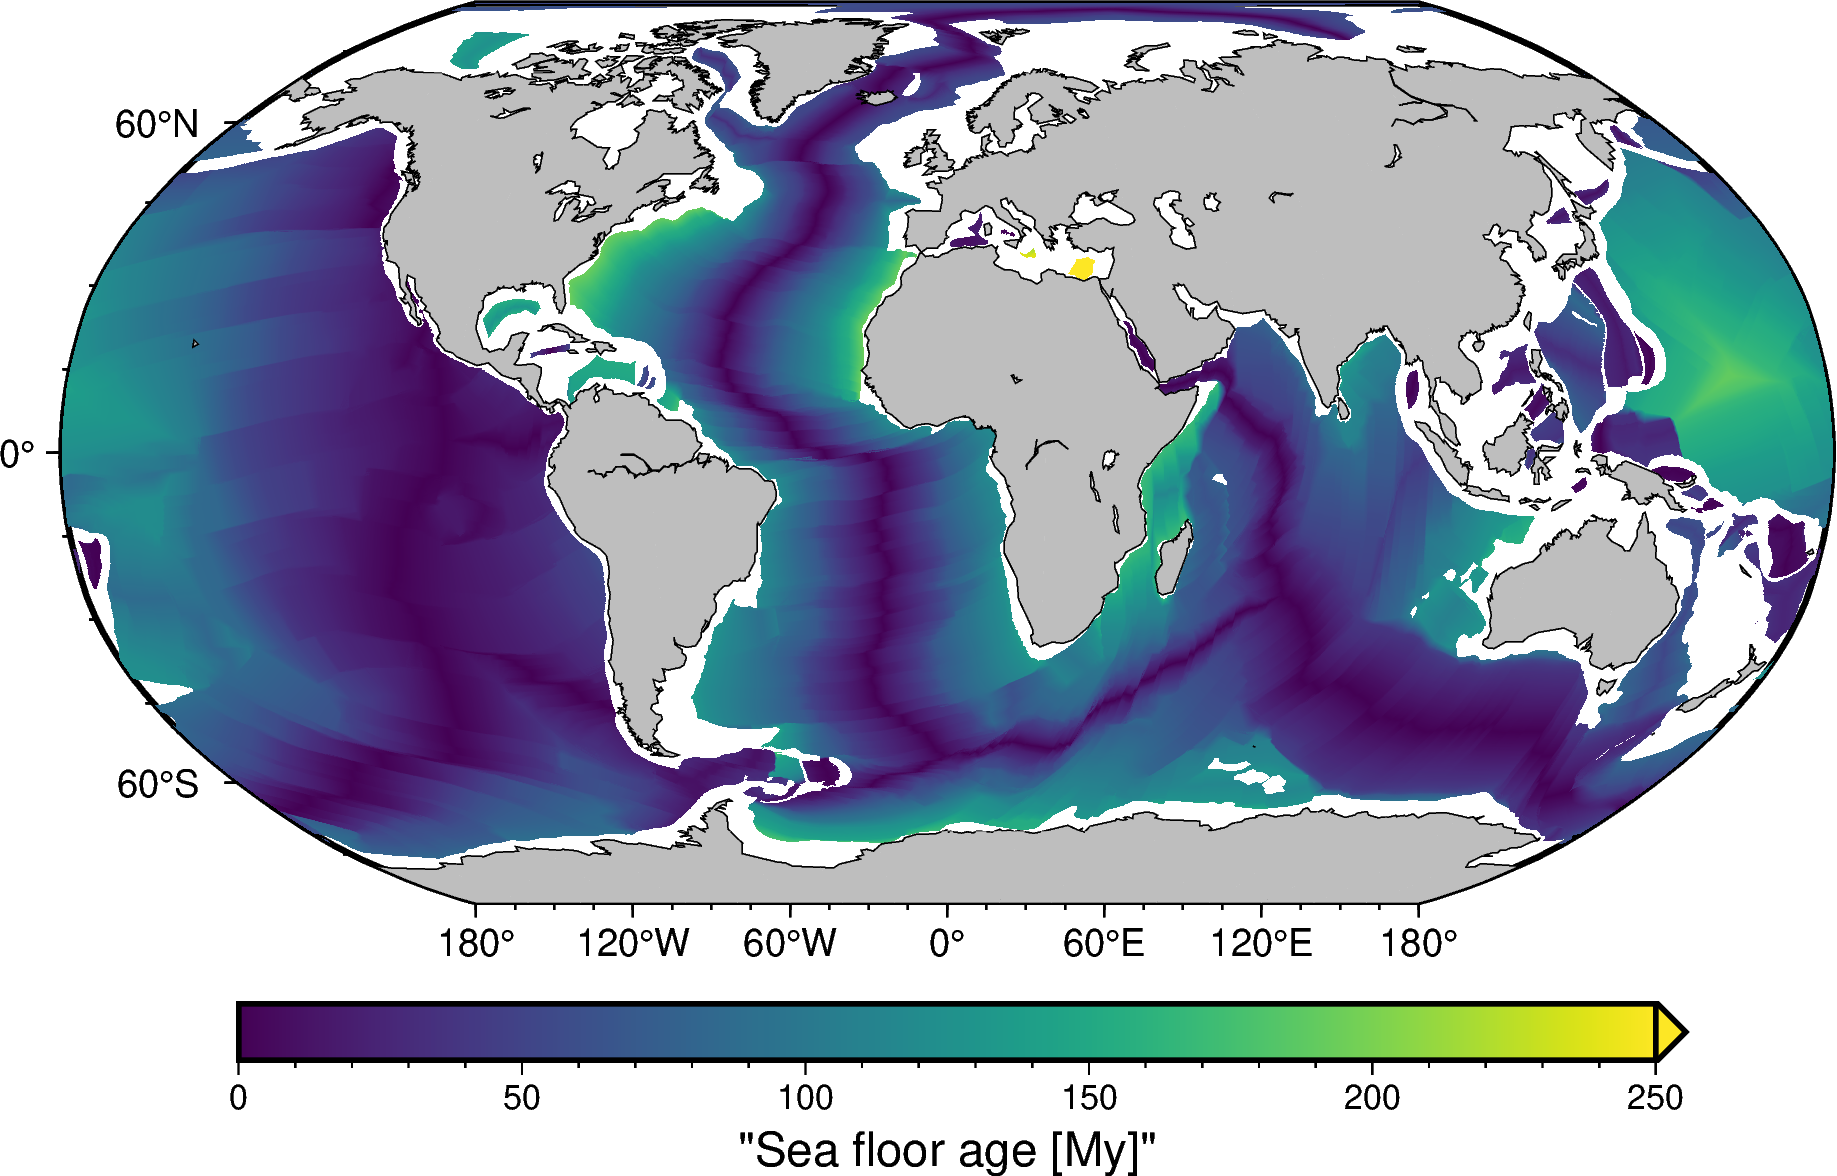

In [18]:
from utils import plot_seafloor

plot_seafloor(da)

## Keeling curve

In [2]:
url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
fname = pooch.retrieve(url, known_hash=None)
fname

'/home/santi/.cache/pooch/ba26221bedb905e9a55a67c50080c30e-monthly_in_situ_co2_mlo.csv'

In [3]:
df = pd.read_csv(fname, comment='"')
df

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,Sta
0,,,,,,adjusted,,adjusted fit,filled,adjusted filled,NaN
1,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],NaN
2,1958,01,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
3,1958,02,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
4,1958,03,21259,1958.2027,315.71,314.44,316.20,314.91,315.71,314.44,MLO
...,...,...,...,...,...,...,...,...,...,...,...
801,2024,08,45519,2024.6230,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
802,2024,09,45550,2024.7077,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
803,2024,10,45580,2024.7896,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
804,2024,11,45611,2024.8743,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO


In [4]:
from utils import preprocess_keeling

df = preprocess_keeling(df)
df

,co2,co2_no_seasonal,co2_smoothed,co2_smoothed_no_seasonal,co2_filled_missing,co2_no_seasonal_filled_missing,station
date,,,,,,,
1958-01-15,NaN,NaN,NaN,NaN,NaN,NaN,MLO
1958-02-15,NaN,NaN,NaN,NaN,NaN,NaN,MLO
1958-03-15,315.71,314.44,316.20,314.91,315.71,314.44,MLO
1958-04-15,317.45,315.16,317.30,314.99,317.45,315.16,MLO
1958-05-15,317.51,314.69,317.89,315.07,317.51,314.69,MLO
...,...,...,...,...,...,...,...
2024-08-15,NaN,NaN,NaN,NaN,NaN,NaN,MLO
2024-09-15,NaN,NaN,NaN,NaN,NaN,NaN,MLO
2024-10-15,NaN,NaN,NaN,NaN,NaN,NaN,MLO


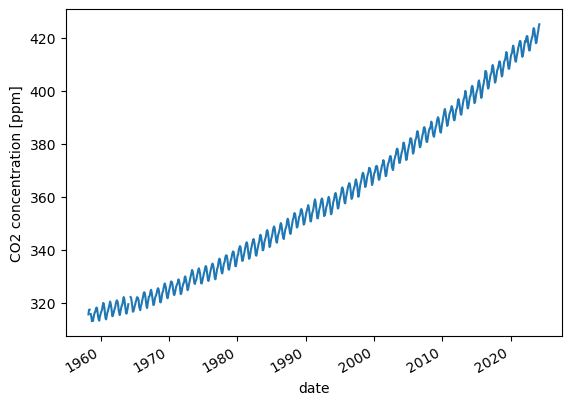

In [5]:
df.co2.plot()
plt.ylabel("CO2 concentration [ppm]")
plt.show()

### Change location of the file

In [6]:
url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
known_hash = "3883b992cbef27e9346bce8e5f7a7fefd479b151dbba4b9471d0ed499a7d94bf"

fname = pooch.retrieve(url, known_hash=known_hash, path=".")
fname

'/home/santi/git/scipy2024-pooch/notebooks/ba26221bedb905e9a55a67c50080c30e-monthly_in_situ_co2_mlo.csv'

## Berkely temperature curve

In [7]:
doi = "10.5281/zenodo.3634713"
url = f"doi:{doi}/Land_and_Ocean_global_average_monthly.txt"
md5_hash = "md5:708be4626734963c8f29978706e104bc"

fname = pooch.retrieve(url, known_hash=md5_hash)
fname

'/home/santi/.cache/pooch/8315c002d419fd20150e16c6d3a957a9-Land_and_Ocean_global_average_monthly.txt'

In [8]:
df = pd.read_csv(fname, sep=r"\s+", comment="%", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1850,1,-0.782,0.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.268,0.396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.413,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.701,0.396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.694,0.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4073,2019,7,0.747,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4074,2019,8,0.747,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4075,2019,9,0.745,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4076,2019,10,0.829,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from utils import preprocess_berkley

df = preprocess_berkley(df)
df

,t_anomaly_monthly,t_anomaly_monthly_uncert,t_anomaly_anually,t_anomaly_anually_uncert,t_anomaly_5y,t_anomaly_5y_uncert,t_anomaly_10y,t_anomaly_10y_uncert,t_anomaly_20y,t_anomaly_20y_uncert
date,,,,,,,,,,
1850-01-15,-0.782,0.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-01-15,-0.729,0.407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02-15,-0.268,0.396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02-15,-0.246,0.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-03-15,-0.413,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-09-15,0.849,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,0.829,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,0.995,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


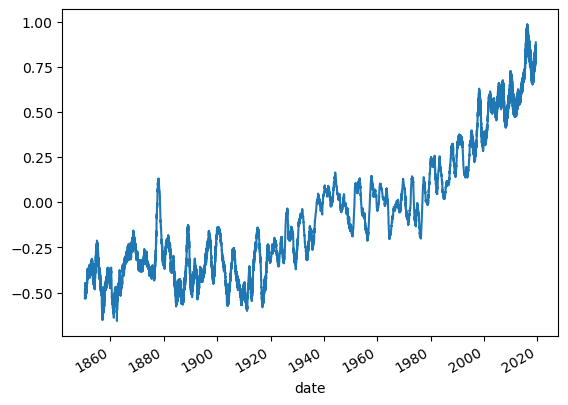

In [10]:
df.t_anomaly_anually.plot()
plt.show()

## Glaciar mass change

In [11]:
doi = "10.5281/zenodo.3557199"
zipfile = "Zemp_etal_results_regions_global_v11.zip"

url = f"doi:{doi}/{zipfile}"
md5_hash = "md5:0be9ed60896d8b3fa20b9b8d18f58471"

fnames = pooch.retrieve(url, known_hash=md5_hash, processor=pooch.Unzip())
fnames

Unzipping contents of '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip' to '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip'


['/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_6_ISL.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_7_SJM.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_2_WNA.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_18_NZL.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_14_ASW.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_8_SCA.csv',
 '/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_region_10

In [12]:
fname, = [f for f in fnames if f.endswith("results_global.csv")]
fname

'/home/santi/.cache/pooch/849e8152eaa6c65e2e3d8e2217cad864-Zemp_etal_results_regions_global_v11.zip.unzip/Zemp_etal_results_global.csv'

In [13]:
df = pd.read_csv(fname, comment="#")
df

,Year,Area_AW_ref_km2,INT_Gt,sig_Glac_Gt,sig_Geod_Gt,sig_Int_Gt,sig_Area_Gt,sig_Crossed_Gt,sig_Total_Gt,INT_SLE,sig_Total_SLE
0,1962,763967,-218,275,148,61,11,24,319,0.601,0.880
1,1963,763386,-44,275,148,61,6,23,319,0.121,0.880
2,1964,762684,71,275,148,61,5,23,319,-0.196,0.880
3,1965,761982,-21,274,148,61,5,22,318,0.058,0.877
4,1966,761280,-97,272,148,61,7,21,316,0.268,0.872
5,1967,760578,-53,271,148,61,8,21,316,0.146,0.872
6,1968,759876,-116,271,148,61,6,20,316,0.320,0.872
7,1969,759174,-165,185,148,61,7,17,245,0.455,0.676
8,1970,758375,-148,176,148,60,6,17,239,0.408,0.659
9,1971,757576,-155,167,148,60,5,16,232,0.428,0.640


In [14]:
from utils import preprocess_zemp

df = preprocess_zemp(df)
df

,Area_AW_ref_km2,INT_Gt,sig_Glac_Gt,sig_Geod_Gt,sig_Int_Gt,sig_Area_Gt,sig_Crossed_Gt,sig_Total_Gt,INT_SLE,sig_Total_SLE
Year,,,,,,,,,,
1962,763967,-218,275,148,61,11,24,319,0.601,0.880
1963,763386,-44,275,148,61,6,23,319,0.121,0.880
1964,762684,71,275,148,61,5,23,319,-0.196,0.880
1965,761982,-21,274,148,61,5,22,318,0.058,0.877
1966,761280,-97,272,148,61,7,21,316,0.268,0.872
1967,760578,-53,271,148,61,8,21,316,0.146,0.872
1968,759876,-116,271,148,61,6,20,316,0.320,0.872
1969,759174,-165,185,148,61,7,17,245,0.455,0.676
1970,758375,-148,176,148,60,6,17,239,0.408,0.659


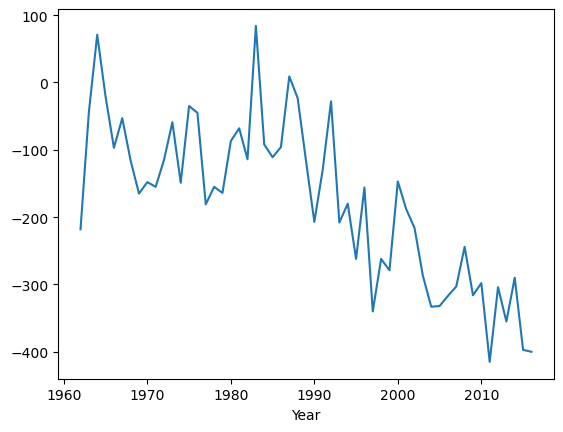

In [15]:
df.INT_Gt.plot()
plt.show()

## Manage multiple files

In [16]:
puppy = pooch.create(
    path=pooch.os_cache("temperature"),
    base_url="doi:10.5281/zenodo.3634713",
    registry={
        "Land_and_Ocean_global_average_monthly.txt": "md5:708be4626734963c8f29978706e104bc",
        "Land_and_Ocean_global_average_annual.txt": "md5:e04f1ba59ba4e35fabe872f47524f151",
    },
)

In [17]:
fname = puppy.fetch("Land_and_Ocean_global_average_monthly.txt")
fname

'/home/santi/.cache/temperature/Land_and_Ocean_global_average_monthly.txt'

In [18]:
fnames = [puppy.fetch(f) for f in puppy.registry]
fnames

['/home/santi/.cache/temperature/Land_and_Ocean_global_average_monthly.txt',
 '/home/santi/.cache/temperature/Land_and_Ocean_global_average_annual.txt']